<a href="https://colab.research.google.com/github/Nellaapriliaa/MachineLearningTasks/blob/main/TUGAS%2011/CIFAR10%20CNN/Nella_Aprilia_1103210185_CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Nella Aprilia

NIM: 1103210185

Kelas: TK4504

Tugas: 11

Dataset: CIFAR-10

Model: CNN

**Instalasi dan Import Library**

In [ ]:
pip install tensorflow


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


**Memuat dan Mempersiapkan Dataset CIFAR-10**

In [ ]:
# Memuat dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi nilai piksel gambar menjadi antara 0 dan 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# (Konversi label pengujian menjadi kategori)
y_cat_test = tf.keras.utils.to_categorical(test_labels, 10)


**Visualisasi Data**

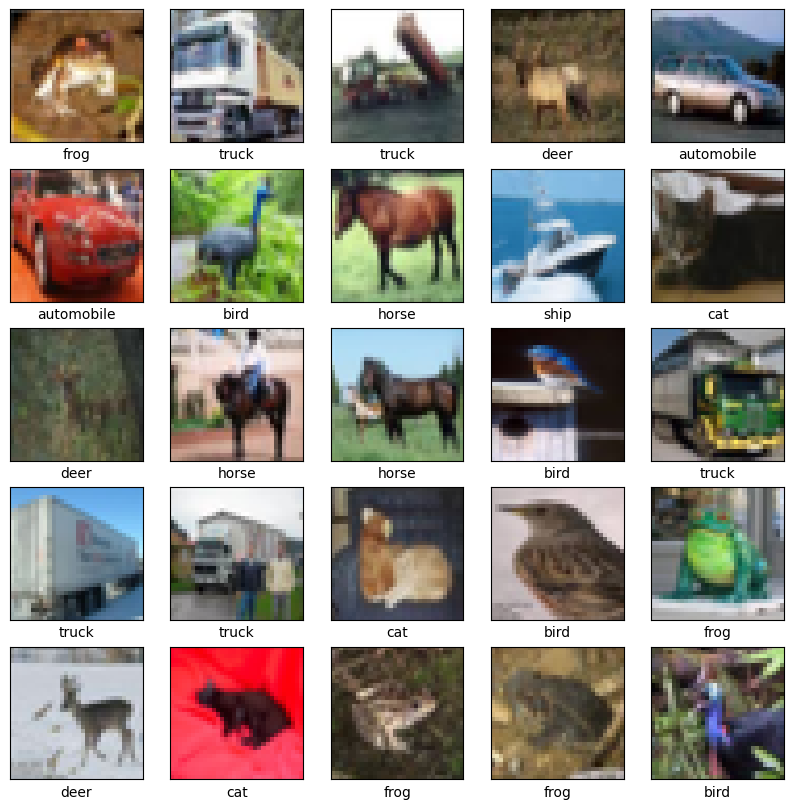

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


**Membangun dan Melatih Model CNN**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Kompilasi model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Melatih model
model.fit(train_images, tf.keras.utils.to_categorical(train_labels, 10), epochs=10, validation_data=(test_images, y_cat_test))


Epoch 1/10
1563/1563 [==============================] - 77s 48ms/step - loss: 1.4907 - accuracy: 0.4595 - val_loss: 1.2379 - val_accuracy: 0.5576
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1267 - accuracy: 0.6012 - val_loss: 1.0309 - val_accuracy: 0.6370
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9672 - accuracy: 0.6614 - val_loss: 1.0002 - val_accuracy: 0.6533
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8678 - accuracy: 0.6965 - val_loss: 0.9439 - val_accuracy: 0.6728
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7924 - accuracy: 0.7213 - val_loss: 0.8469 - val_accuracy: 0.7075
Epoch 6/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7371 - accuracy: 0.7427 - val_loss: 0.8451 - val_accuracy: 0.7080
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6849 - accuracy: 0.7603 - val_loss: 0.8606 -

**Menampilkan Kurva Akurasi dan Loss**

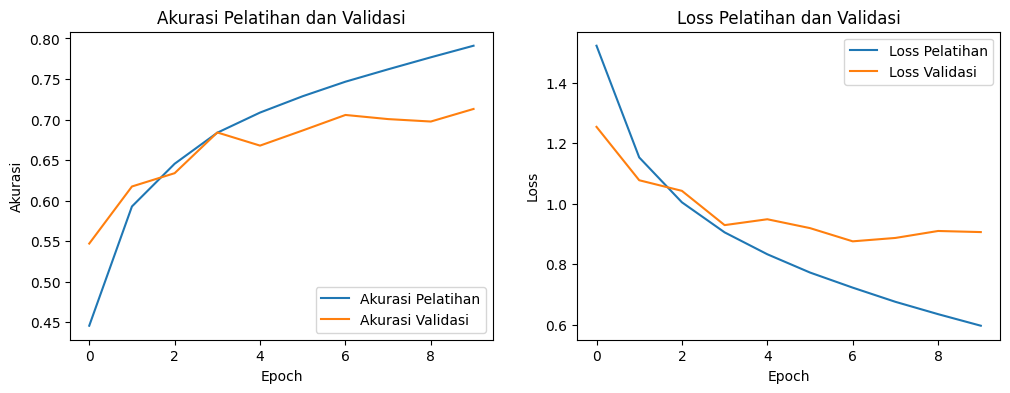

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

plt.show()


**Menggunakan Dataset Pengujian**

In [ ]:
X_test = test_images
y_test = test_labels.flatten()  # Flatten karena confusion_matrix membutuhkan array 1 dimensi
y_cat_test = tf.keras.utils.to_categorical(y_test, 10)  # Mengubah label menjadi kategori jika diperlukan


**Mengevaluasi Model**

In [ ]:
# Mengevaluasi model
evaluation = model.evaluate(test_images, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')



313/313 [==============================] - 7s 22ms/step - loss: 0.8834 - accuracy: 0.7192
Test Accuracy : 71.92%


**Menampilkan Prediksi dan Gambar Hasil**

313/313 [==============================] - 3s 11ms/step


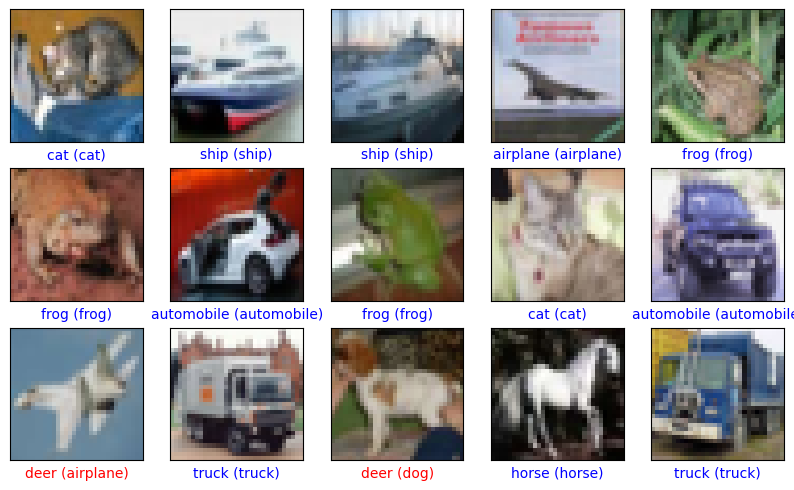

In [ ]:
# Membuat prediksi
predictions = model.predict(test_images)

# Menampilkan beberapa gambar dengan prediksi dan label sebenarnya
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()


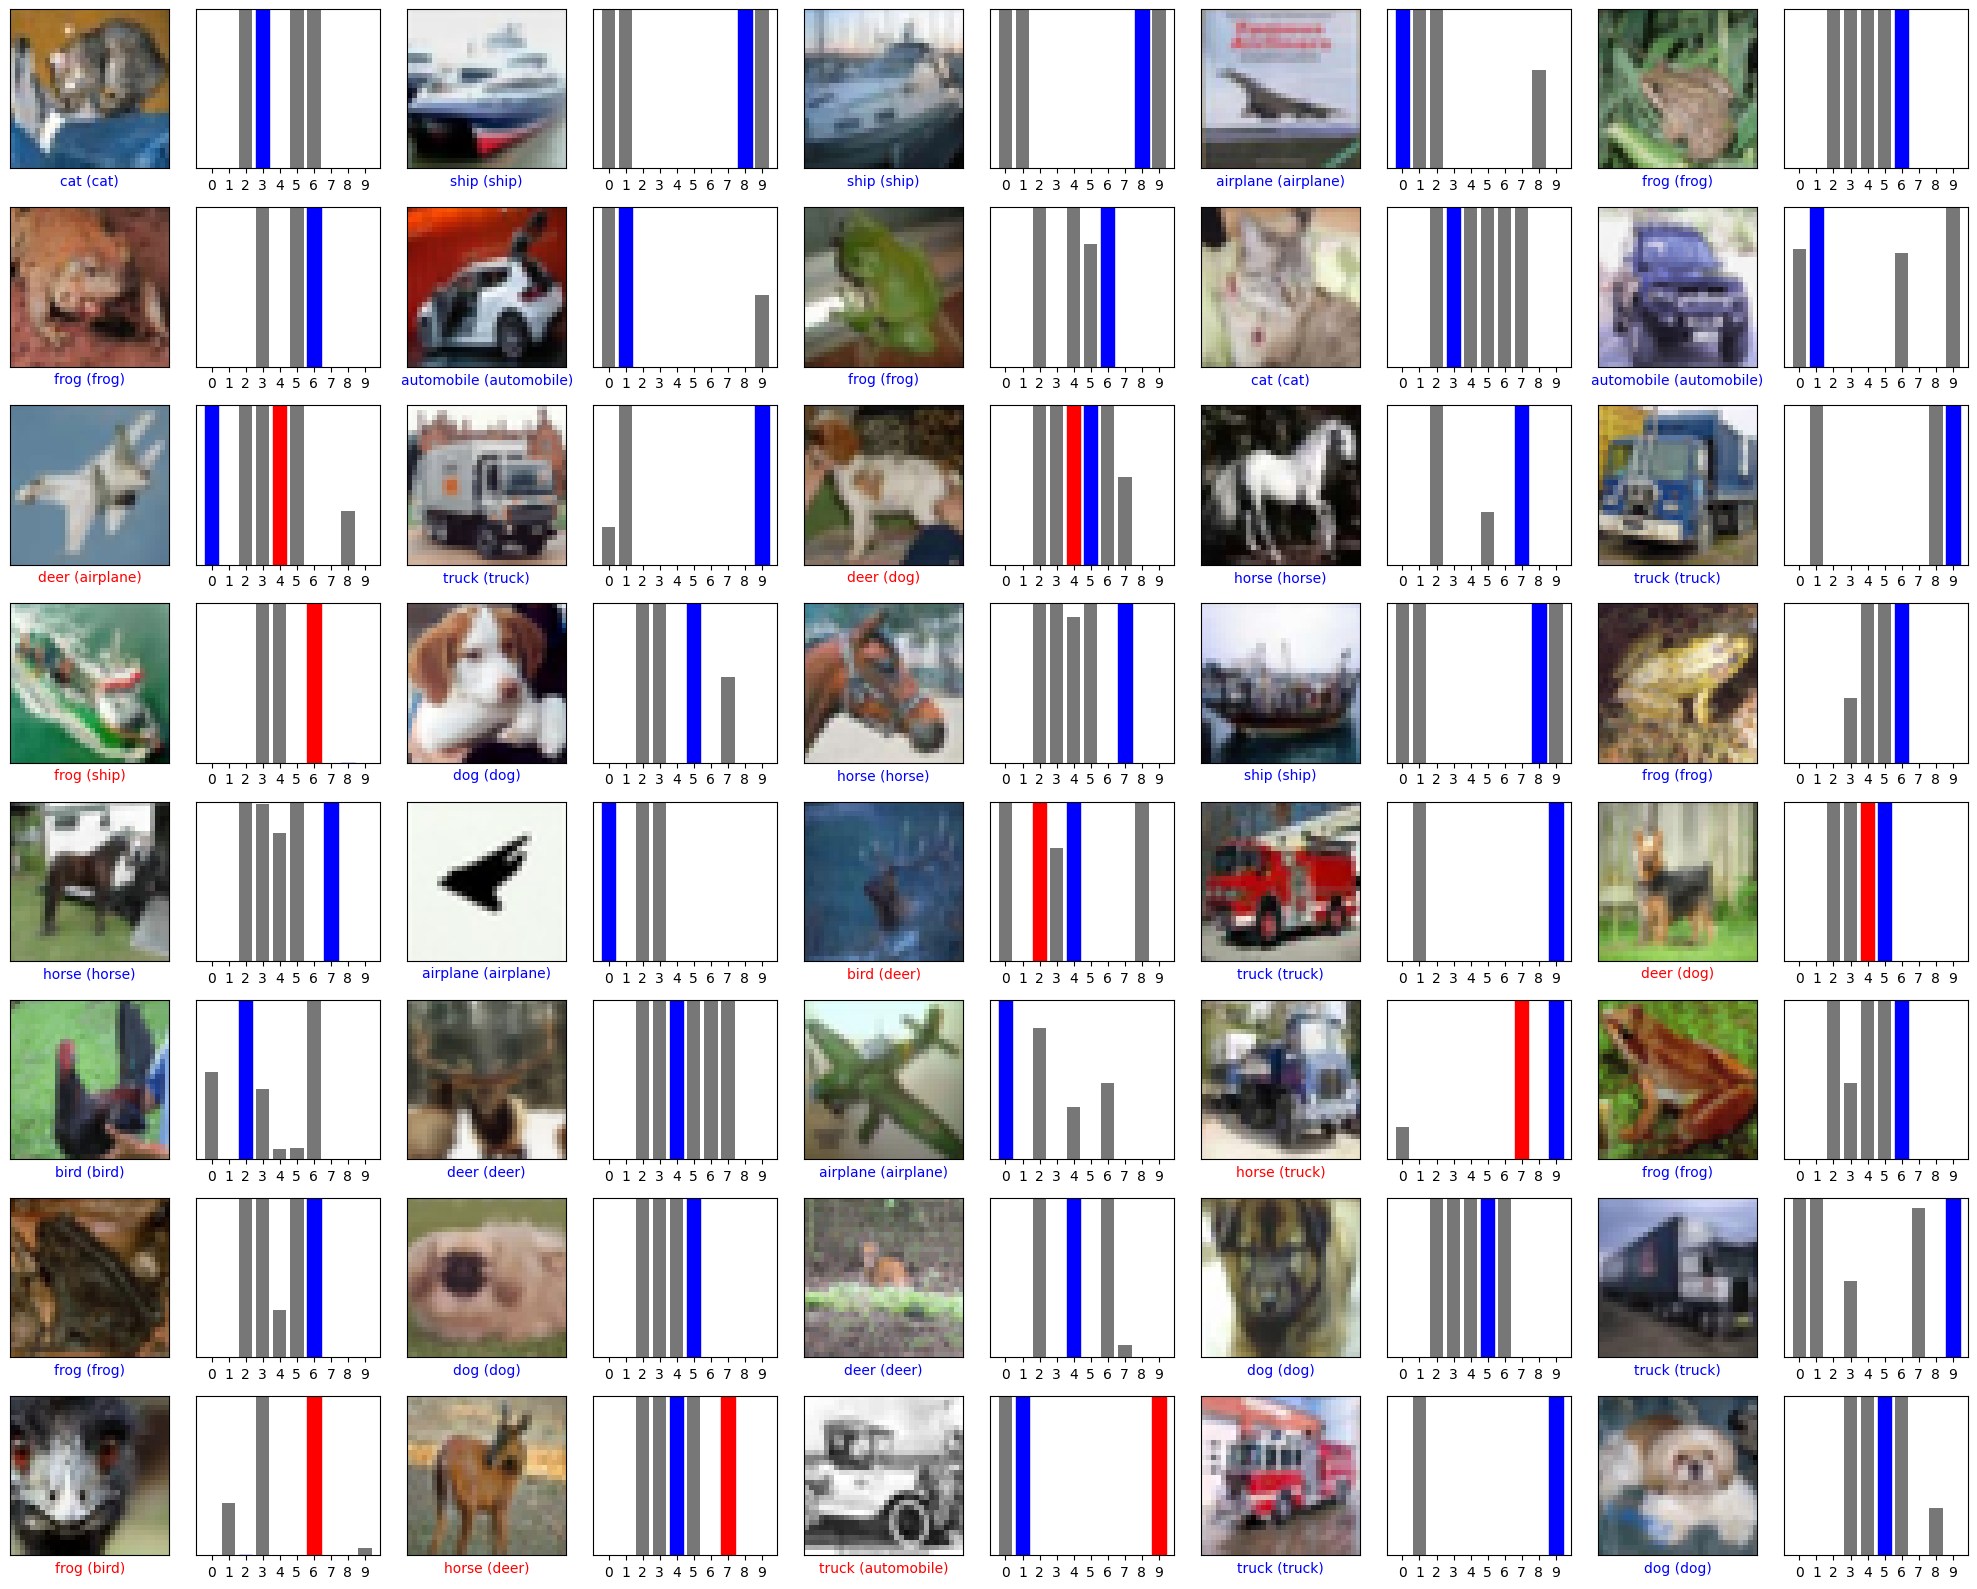

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label[0]]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

# Plotting the images with predictions
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


313/313 [==============================] - 5s 17ms/step - loss: 0.8834 - accuracy: 0.7192
Test Accuracy : 71.92%
313/313 [==============================] - 5s 15ms/step


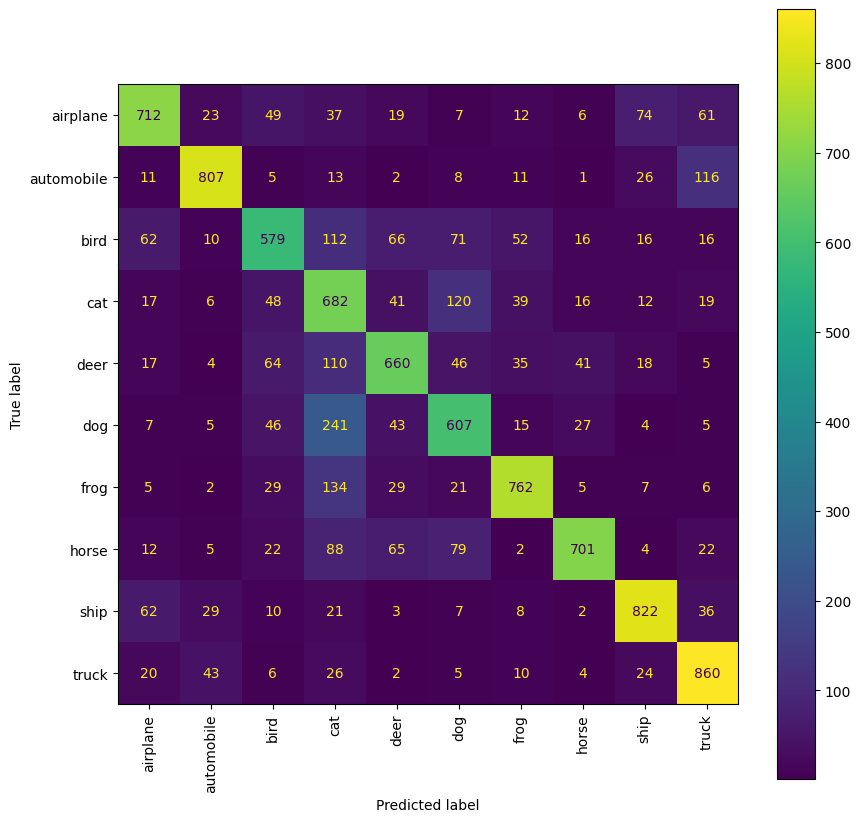

In [ ]:
# Evaluasi model
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

# Membuat prediksi
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(xticks_rotation='vertical', ax=ax, cmap='viridis')  # Ubah cmap sesuai dengan skema warna yang Anda inginkan

plt.show()
